<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Khai báo thư viện
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/FLOWER/flower

/content/drive/MyDrive/FLOWER/flower


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/FLOWER/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 12 images belonging to 3 classes.


In [7]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/FLOWER/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 12 images belonging to 3 classes.


In [8]:
train_set.class_indices

{'hoa dao': 0, 'hoa hong': 1, 'hoa mai': 2}

In [9]:
test_set.class_indices

{'hoa dao': 0, 'hoa hong': 1, 'hoa mai': 2}

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [13]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 1.4679 - accuracy: 0.4167 - val_loss: 22.7419 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 22.2422 - accuracy: 0.3333 - val_loss: 6.0683 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 5.8278 - accuracy: 0.5000 - val_loss: 10.3070 - val_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 9.9447 - accuracy: 0.2500 - val_loss: 1.5628 - val_accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.5085 - accuracy: 0.6667 - val_loss: 0.8030 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.7910 - accuracy: 0.4167 - val_loss: 0.5526 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.3601 - accuracy: 0.7500 - val_loss: 0.3655 - val_accuracy: 0.7500
Epoch 8/100
1/1 [==============

In [14]:
model.save('Nhan_dien_hoa.h5')

In [15]:
model_hoa = load_model('Nhan_dien_hoa.h5')

In [16]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0003097877197433263
Train Accuracy 1.0


1/1 [==============================] - 0s 59ms/step
hoa hong


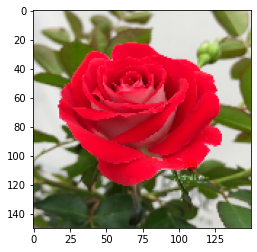

In [18]:
img = load_img('/content/hoa hong.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
if round(result[0][0])==1:
  prediction='hoa dao'
if round(result[0][1])==1:
  prediction='hoa hong'
if round(result[0][2])==1:
  prediction='hoa mai'
print(prediction)